<a href="https://colab.research.google.com/github/Joseph-Kubinski/Joseph-Kubinski/blob/main/Weather_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [462]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [463]:
df = pd.read_csv('/content/sample_data/weather/weatherHistory.csv')

In [464]:
df.head()


,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [465]:
df.describe()


,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
count,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.0,96453.000000
mean,11.932678,10.855029,0.734899,10.810640,187.509232,10.347325,0.0,1003.235956
std,9.551546,10.696847,0.195473,6.913571,107.383428,4.192123,0.0,116.969906
min,-21.822222,-27.716667,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,4.688889,2.311111,0.600000,5.828200,116.000000,8.339800,0.0,1011.900000
50%,12.000000,12.000000,0.780000,9.965900,180.000000,10.046400,0.0,1016.450000
75%,18.838889,18.838889,0.890000,14.135800,290.000000,14.812000,0.0,1021.090000
max,39.905556,39.344444,1.000000,63.852600,359.000000,16.100000,0.0,1046.380000


In [466]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            96453 non-null  object 
 1   Summary                   96453 non-null  object 
 2   Precip Type               95936 non-null  object 
 3   Temperature (C)           96453 non-null  float64
 4   Apparent Temperature (C)  96453 non-null  float64
 5   Humidity                  96453 non-null  float64
 6   Wind Speed (km/h)         96453 non-null  float64
 7   Wind Bearing (degrees)    96453 non-null  float64
 8   Visibility (km)           96453 non-null  float64
 9   Loud Cover                96453 non-null  float64
 10  Pressure (millibars)      96453 non-null  float64
 11  Daily Summary             96453 non-null  object 
dtypes: float64(8), object(4)
memory usage: 8.8+ MB


**identified** missing  rows - percip type
Please not the loud cover might mean "Cloud cover", lets see if we can edit that




In [467]:
df = df.drop(['Loud Cover'], axis=1)

In [468]:
df['Precip Type'].value_counts()
df.iloc[43543]

Formatted Date              2010-09-25 07:00:00.000 +0200
Summary                                          Overcast
Precip Type                                          rain
Temperature (C)                                 13.861111
Apparent Temperature (C)                        13.861111
Humidity                                             0.83
Wind Speed (km/h)                                 13.9748
Wind Bearing (degrees)                              129.0
Visibility (km)                                     9.982
Pressure (millibars)                               1005.6
Daily Summary                  Mostly cloudy until night.
Name: 43543, dtype: object

Dropped "Loud Cover, no relevant data, seems like a mistake row.

In [469]:
df.shape

(96453, 11)

In [470]:
df.corr()

<ipython-input-470-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
Temperature (C),1.000000,0.992629,-0.632255,0.008957,0.029988,0.392847,-0.005447
Apparent Temperature (C),0.992629,1.000000,-0.602571,-0.056650,0.029031,0.381718,-0.000219
Humidity,-0.632255,-0.602571,1.000000,-0.224951,0.000735,-0.369173,0.005454
Wind Speed (km/h),0.008957,-0.056650,-0.224951,1.000000,0.103822,0.100749,-0.049263
Wind Bearing (degrees),0.029988,0.029031,0.000735,0.103822,1.000000,0.047594,-0.011651
Visibility (km),0.392847,0.381718,-0.369173,0.100749,0.047594,1.000000,0.059818
Pressure (millibars),-0.005447,-0.000219,0.005454,-0.049263,-0.011651,0.059818,1.000000


<ipython-input-471-3a9f445661b7>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), cmap="Blues",annot=True, cbar=True, vmin=-1, vmax=1);


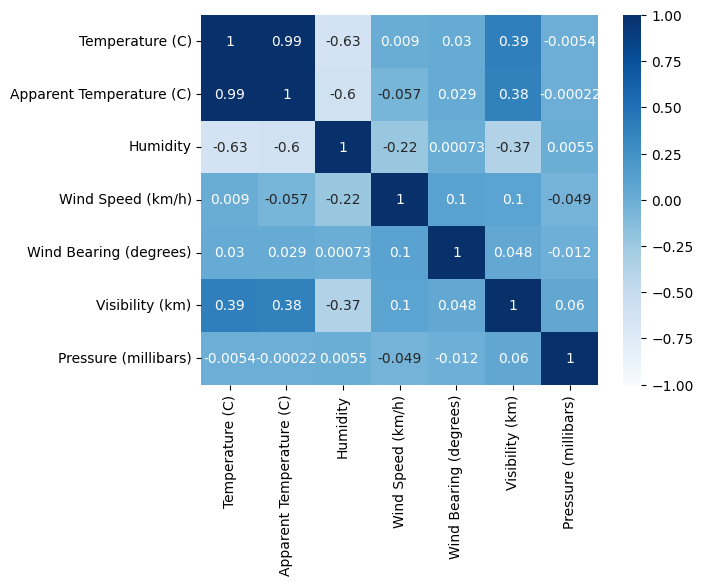

In [471]:
sns.heatmap(df.corr(), cmap="Blues",annot=True, cbar=True, vmin=-1, vmax=1);

Need to clean that heatmap to hide loud cover. C/w



Lets split the data now, get me a training and a test set, 80-20 rule if i remember.
But what is our target? what am i trying to acheive with this data?
lets go with given our data, will it rain the next hour.

so, what does our data look like?

In [472]:
df.iloc[3]

Formatted Date                  2006-04-01 03:00:00.000 +0200
Summary                                         Partly Cloudy
Precip Type                                              rain
Temperature (C)                                      8.288889
Apparent Temperature (C)                             5.944444
Humidity                                                 0.83
Wind Speed (km/h)                                     14.1036
Wind Bearing (degrees)                                  269.0
Visibility (km)                                       15.8263
Pressure (millibars)                                  1016.41
Daily Summary               Partly cloudy throughout the day.
Name: 3, dtype: object

Not sure i like how that date is for this kind of project.Let's explore if i can split up that formatted date into seperate columns

1.   Split up date
2.   Transform non-numerical data types



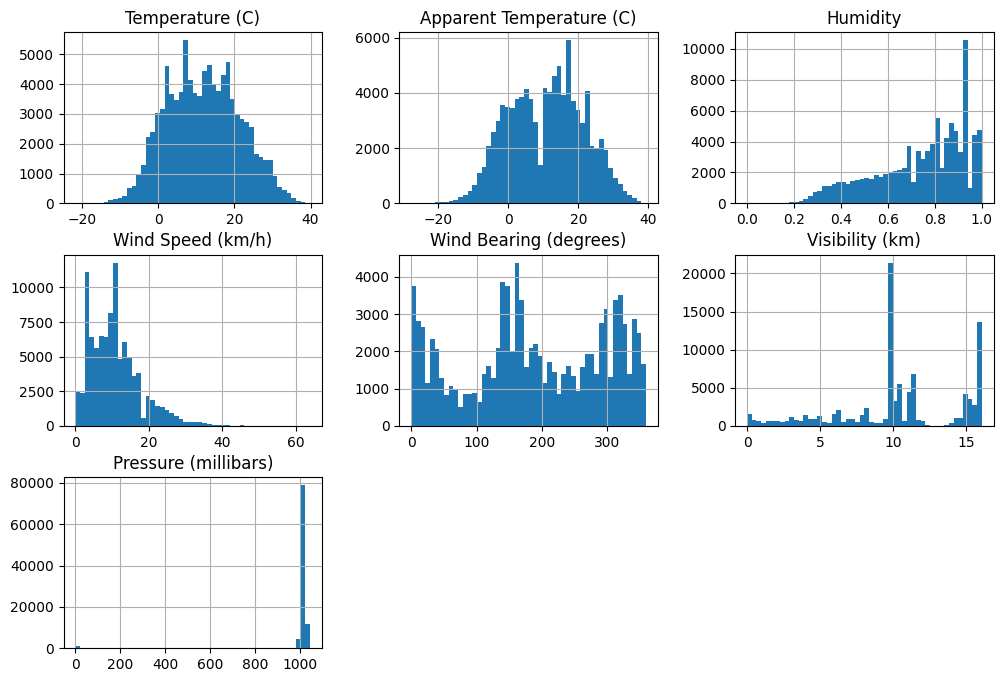

In [473]:


df.hist(bins=50, figsize=(12, 8))
plt.show()

Looks like all around we have some good bell curves, going to need to transfrom pressure

In [474]:
#split up test/train sets
#Need to identify if anything is correlated to percip type. to do that I need to change the percip type to array to find corr
from sklearn.preprocessing import OrdinalEncoder




In [475]:
#need to fix the precip row
df.dropna(subset=['Precip Type'], inplace=True)

In [476]:
cat_encoder = OrdinalEncoder()
df_cat_sum = df[['Summary']]
df_cat_sum.head(8)

,Summary
0,Partly Cloudy
1,Partly Cloudy
2,Mostly Cloudy
3,Partly Cloudy
4,Mostly Cloudy
5,Partly Cloudy
6,Partly Cloudy
7,Partly Cloudy


In [477]:
df_cat_sum_encoded = cat_encoder.fit_transform(df_cat_sum)

In [478]:
df_cat_sum_encoded

array([[19.],
       [19.],
       [17.],
       ...,
       [19.],
       [19.],
       [19.]])

In [479]:
cat_encoder.categories_

[array(['Breezy', 'Breezy and Dry', 'Breezy and Foggy',
        'Breezy and Mostly Cloudy', 'Breezy and Overcast',
        'Breezy and Partly Cloudy', 'Clear',
        'Dangerously Windy and Partly Cloudy', 'Drizzle', 'Dry',
        'Dry and Mostly Cloudy', 'Dry and Partly Cloudy', 'Foggy',
        'Humid and Mostly Cloudy', 'Humid and Overcast',
        'Humid and Partly Cloudy', 'Light Rain', 'Mostly Cloudy',
        'Overcast', 'Partly Cloudy', 'Rain', 'Windy', 'Windy and Dry',
        'Windy and Foggy', 'Windy and Mostly Cloudy', 'Windy and Overcast',
        'Windy and Partly Cloudy'], dtype=object)]


*   Which encoding strategy is better for large category sets?
*   Which one is better for this?
*   Read on "embedding"


In [480]:
#lets replace the summary column
df['Summary'] = df_cat_sum_encoded
df['Summary']

0        19.0
1        19.0
2        17.0
3        19.0
4        17.0
         ... 
96448    19.0
96449    19.0
96450    19.0
96451    19.0
96452    19.0
Name: Summary, Length: 95936, dtype: float64

In [481]:
df['Daily Summary'].value_counts()

Mostly cloudy throughout the day.         20020
Partly cloudy throughout the day.          9930
Partly cloudy until night.                 6169
Partly cloudy starting in the morning.     5177
Foggy in the morning.                      4201
                                          ...  
Rain until afternoon.                        17
Rain until morning.                          12
Light rain in the morning.                   11
Drizzle starting in the evening.              9
Light rain overnight.                         3
Name: Daily Summary, Length: 214, dtype: int64

In [482]:
#now encode the other categories
#need to do percip type and daily summary
cat_encoder_1 = OrdinalEncoder()
df_cat_ptype = df[['Precip Type']]
df_cat_ptype_encoded = cat_encoder_1.fit_transform(df_cat_ptype)
df_cat_ptype_encoded
df['Precip Type'] = df_cat_ptype_encoded
df['Precip Type']

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
96448    0.0
96449    0.0
96450    0.0
96451    0.0
96452    0.0
Name: Precip Type, Length: 95936, dtype: float64

In [483]:
precip_types = cat_encoder_1.categories_

In [484]:
cat_encoder_2 = OrdinalEncoder()
df_cat_dsum = df[['Daily Summary']]
df_cat_dsum_encoded = cat_encoder_2.fit_transform(df_cat_dsum)

df['Daily Summary'] = df_cat_dsum_encoded
df['Daily Summary']

0        197.0
1        197.0
2        197.0
3        197.0
4        197.0
         ...  
96448    170.0
96449    170.0
96450    170.0
96451    170.0
96452    170.0
Name: Daily Summary, Length: 95936, dtype: float64

In [485]:
cat_encoder_2.categories_

[array(['Breezy and foggy starting in the evening.',
        'Breezy and foggy until morning.',
        'Breezy and mostly cloudy overnight.',
        'Breezy and partly cloudy in the afternoon.',
        'Breezy in the morning and foggy in the evening.',
        'Breezy in the morning and mostly cloudy starting in the evening.',
        'Breezy in the morning and mostly cloudy starting in the morning.',
        'Breezy in the morning and partly cloudy starting in the evening continuing until night.',
        'Breezy overnight and mostly cloudy throughout the day.',
        'Breezy overnight and overcast throughout the day.',
        'Breezy overnight and partly cloudy throughout the day.',
        'Breezy overnight and partly cloudy until evening.',
        'Breezy starting in the afternoon continuing until evening and foggy in the evening.',
        'Breezy starting in the afternoon continuing until evening and foggy starting in the evening.',
        'Breezy starting in the afternoo

<ipython-input-486-3a9f445661b7>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), cmap="Blues",annot=True, cbar=True, vmin=-1, vmax=1);


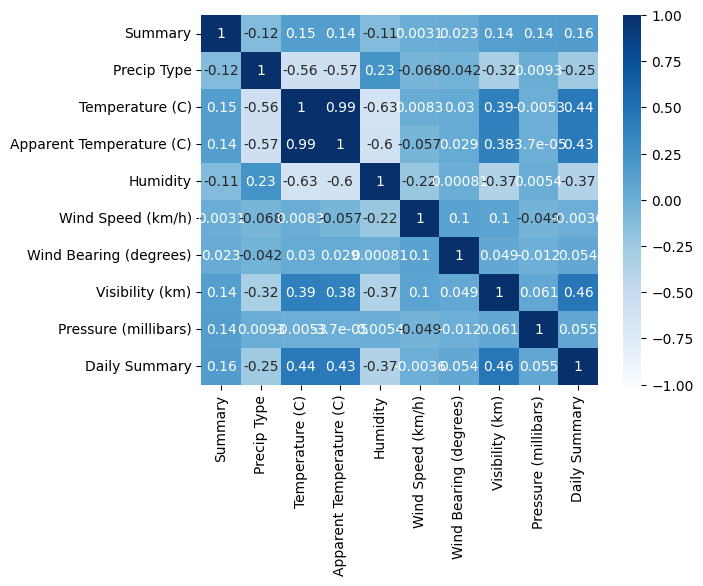

In [486]:
sns.heatmap(df.corr(), cmap="Blues",annot=True, cbar=True, vmin=-1, vmax=1);

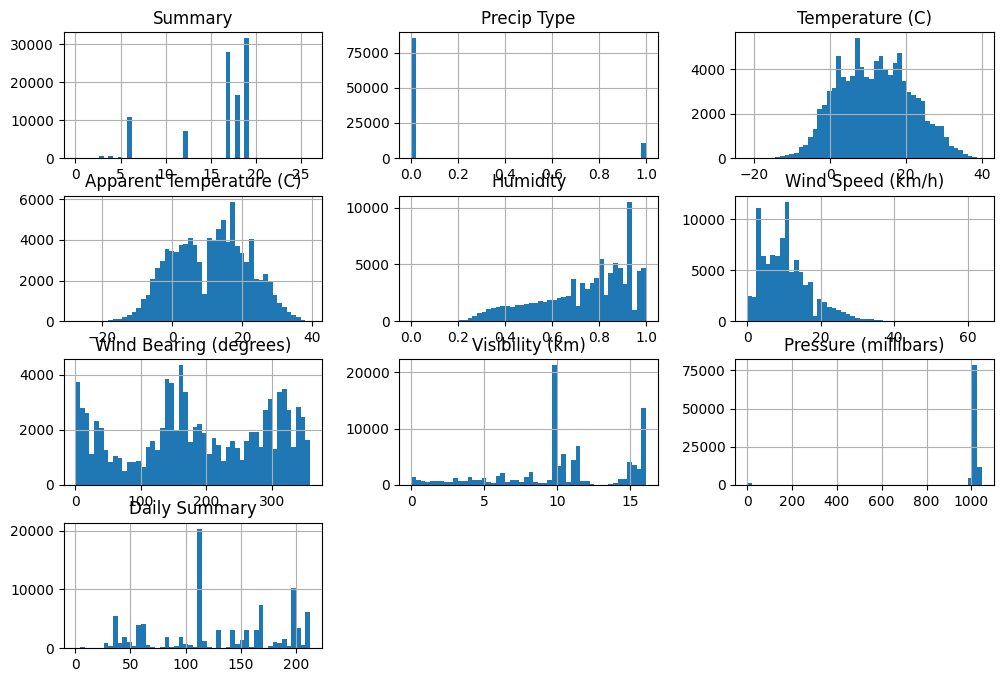

In [487]:
df.hist(bins=50, figsize=(12, 8))
plt.show()

In [488]:
#still need to clean up the dates/times
#need to figure out what's going on the encoding...
#hundreds of different daily summaries? The code seems
#right but is there a better way to handle this?

date1 = df.iloc[1,0]
print(date1)

2006-04-01 01:00:00.000 +0200


In [489]:
#chop up the string and make it into seprate values
#seperate first
print(len(date1))
column = date1.split()
print(column)

29
['2006-04-01', '01:00:00.000', '+0200']


In [490]:
def date_splitter(text):
  split_date = text.split()
  if split_date:
    return split_date[0]
  else:
    return None
def time_splitter(text):
  split_date = text.split()
  if split_date:
    return split_date[1]
  else:
    return None
def tz_splitter(text):
  split_date = text.split()
  if split_date:
    return split_date[2]
  else:
    return None

df['Date'] = df['Formatted Date'].apply(date_splitter)
df['Time'] = df['Formatted Date'].apply(time_splitter)
df['TZ'] = df['Formatted Date'].apply(tz_splitter)

In [491]:
df.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Daily Summary,Date,Time,TZ
0,2006-04-01 00:00:00.000 +0200,19.0,0.0,9.472222,7.388889,0.89,14.1197,251.0,15.8263,1015.13,197.0,2006-04-01,00:00:00.000,+0200
1,2006-04-01 01:00:00.000 +0200,19.0,0.0,9.355556,7.227778,0.86,14.2646,259.0,15.8263,1015.63,197.0,2006-04-01,01:00:00.000,+0200
2,2006-04-01 02:00:00.000 +0200,17.0,0.0,9.377778,9.377778,0.89,3.9284,204.0,14.9569,1015.94,197.0,2006-04-01,02:00:00.000,+0200
3,2006-04-01 03:00:00.000 +0200,19.0,0.0,8.288889,5.944444,0.83,14.1036,269.0,15.8263,1016.41,197.0,2006-04-01,03:00:00.000,+0200
4,2006-04-01 04:00:00.000 +0200,17.0,0.0,8.755556,6.977778,0.83,11.0446,259.0,15.8263,1016.51,197.0,2006-04-01,04:00:00.000,+0200


<ipython-input-492-3a9f445661b7>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), cmap="Blues",annot=True, cbar=True, vmin=-1, vmax=1);


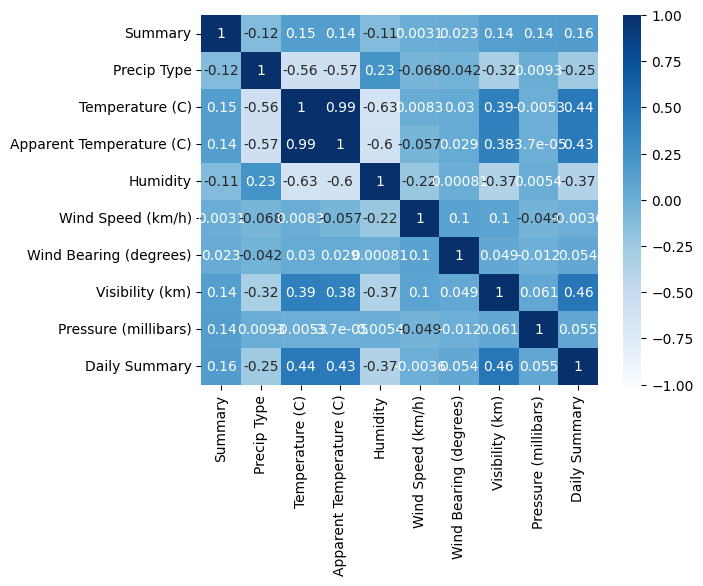

In [492]:
sns.heatmap(df.corr(), cmap="Blues",annot=True, cbar=True, vmin=-1, vmax=1);

In [493]:
#looks like our dates and times arent gling to be read still. have to think of how to convert/transform
# df = df.drop(['Formatted Date'], axis=1)
#lets break down the date to get integers. Going to be the same process as above.
def year_splitter(text):
  split_date = text.split("-")
  if split_date:
    return split_date[0]
  else:
    return None

df['Year'] = df['Date'].apply(year_splitter)

def month_splitter(text):
  split_date = text.split("-")
  if split_date:
    return split_date[1]
  else:
    return None

df['Month'] = df['Date'].apply(month_splitter)

def day_splitter(text):
  split_date = text.split("-")
  if split_date:
    return split_date[2]
  else:
    return None

df['Day'] = df['Date'].apply(day_splitter)
df = df.drop(['Date'], axis=1)
#looks like our dates columns still arent integers?

In [494]:
date1 = df.iloc[0,13]
#Change to ints
df['Year'] = df['Year'].astype(int)
df['Month'] = df['Month'].astype(int)
df['Day'] = df['Day'].astype(int)

In [495]:
date1

'2006'

<ipython-input-496-a626b33f146e>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), cmap="Blues",cbar=True, vmin=-1, vmax=1);


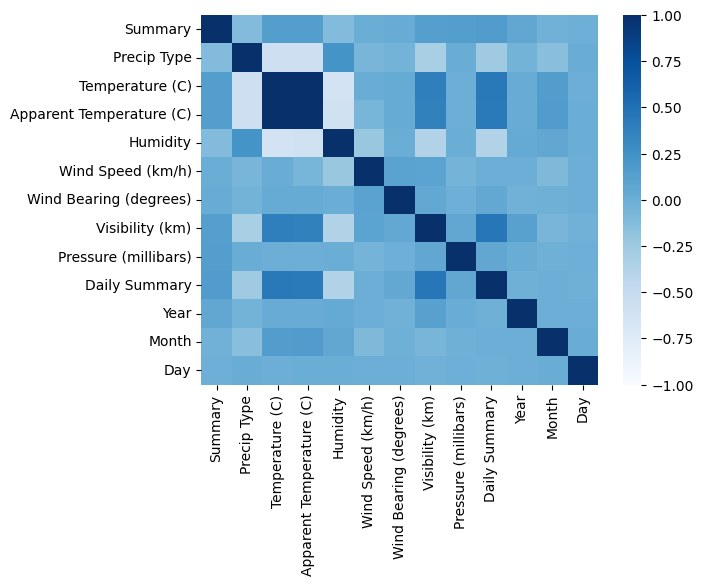

In [496]:
sns.heatmap(df.corr(), cmap="Blues",cbar=True, vmin=-1, vmax=1);
#annot=True,
#time to split time. Only going to pull out the hour bc it seems they didnhave anything else
def hour_splitter(text):
  split_date = text.split(":")
  if split_date:
    return split_date[0]
  else:
    return None

df['Hour'] = df['Time'].apply(hour_splitter)

df['Hour'] = df['Hour'].astype(int)
df = df.drop(['Time'], axis=1)

In [497]:
df["TZ"].value_counts()
cat_encoder_3 = OrdinalEncoder()
df_cat_TZ = df[['TZ']]
df_cat_TZ_encoded = cat_encoder_3.fit_transform(df_cat_TZ)
#encoding, theres only two options and the numbers wont have much of an effect.
df['TZ'] = df_cat_TZ_encoded
df['TZ']
df = df.drop(['Formatted Date'], axis=1)

In [498]:
#now we need to transform the numbers a little and look at the histograms to see if there is any skewing
#before we go any further, lets ppull out the target variable?percipitation type will be pulled out, then trained on

#NOTE FROM THE PAST
#unfortunately it seems that our data only has rain or snow as percipitation types,
# nothing else. seems that I need to use some other target variable.
# lets change it too given the data, predict the humidity

In [499]:
X = df.drop(["Humidity"], axis=1)
y = df['Humidity']

In [500]:
print(X)

       Summary  Precip Type  Temperature (C)  Apparent Temperature (C)  \
0         19.0          0.0         9.472222                  7.388889   
1         19.0          0.0         9.355556                  7.227778   
2         17.0          0.0         9.377778                  9.377778   
3         19.0          0.0         8.288889                  5.944444   
4         17.0          0.0         8.755556                  6.977778   
...        ...          ...              ...                       ...   
96448     19.0          0.0        26.016667                 26.016667   
96449     19.0          0.0        24.583333                 24.583333   
96450     19.0          0.0        22.038889                 22.038889   
96451     19.0          0.0        21.522222                 21.522222   
96452     19.0          0.0        20.438889                 20.438889   

       Wind Speed (km/h)  Wind Bearing (degrees)  Visibility (km)  \
0                14.1197                  

In [501]:
from sklearn.model_selection import train_test_split
#lets split it up and see how it goes for now
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [502]:
df.head()

,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Daily Summary,TZ,Year,Month,Day,Hour
0,19.0,0.0,9.472222,7.388889,0.89,14.1197,251.0,15.8263,1015.13,197.0,1.0,2006,4,1,0
1,19.0,0.0,9.355556,7.227778,0.86,14.2646,259.0,15.8263,1015.63,197.0,1.0,2006,4,1,1
2,17.0,0.0,9.377778,9.377778,0.89,3.9284,204.0,14.9569,1015.94,197.0,1.0,2006,4,1,2
3,19.0,0.0,8.288889,5.944444,0.83,14.1036,269.0,15.8263,1016.41,197.0,1.0,2006,4,1,3
4,17.0,0.0,8.755556,6.977778,0.83,11.0446,259.0,15.8263,1016.51,197.0,1.0,2006,4,1,4


In [503]:
#Model training
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

Looks like i ran into NaN's not being allowed in fitting of models. back to the data cleaning. Forgot to add the missing data. Next error is it seems the formatted dates are back somehow. Wasn't actually altering the DF when dropping that column

In [504]:
precip_types

[array(['rain', 'snow'], dtype=object)]

In [508]:
#how good is it? lets predict
train_predict = model.predict(X_train)
print(train_predict)

[0.59301827 0.47295821 0.65793222 ... 0.734584   0.66169172 0.82688226]


In [506]:
#whoops...this should be 1's or 0's right...?
#score and see
from sklearn import metrics
score_1 = metrics.r2_score(Y_train, train_predict)
score_2 = metrics.mean_absolute_error(Y_train, train_predict)
print("R sqaured error:", + score_1)
print("Mean absolute error:", + score_2)

R sqaured error: 0.560373564615795
Mean absolute error: 0.10230393785906385


In [509]:
#numbers arent very good. lets try the test data just to see
#error:found input variable with inconsistent number of samples
train_predict = model.predict(X_test)
score_3 = metrics.r2_score(Y_test, train_predict)
score_4 = metrics.mean_absolute_error(Y_test, train_predict)
print("R sqaured error:", + score_3)
print("Mean absolute error:", + score_4)

R sqaured error: 0.558499892650816
Mean absolute error: 0.10237423837366678


In [514]:
Y_train.shape


(19188,)

In [515]:
train_predict.shape

(19188,)

In [518]:
print(train_predict)

[0.70062241 0.61492675 0.71759614 ... 0.68738352 0.75604818 0.864344  ]


In [523]:
print(Y_train)

49839    0.58
23605    0.39
26053    0.59
3299     0.79
90469    0.66
         ... 
6265     0.84
54964    0.85
76963    0.90
860      0.82
15795    0.90
Name: Humidity, Length: 76748, dtype: float64


In [528]:
#It seems 50% of the time it is accurate within 10%.

#tomorrow i will try a different regressor/model, if i dont see better results that way I will try to fix the data.